In [ ]:
import kagglehub


path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shwetabh123/mall-customers/versions/1


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv(path + "/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
data.rename(columns={'Spending Score (1-100)': 'Score'}, inplace=True)


In [ ]:
data.rename(columns={'Annual Income (k$)': 'Income'}, inplace=True)

In [ ]:
data = data.drop(columns=['CustomerID'])

In [ ]:
data['Genre'] = data['Genre'].map({'Male': 0, 'Female': 1})

In [ ]:
X = data[['Income', 'Score']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


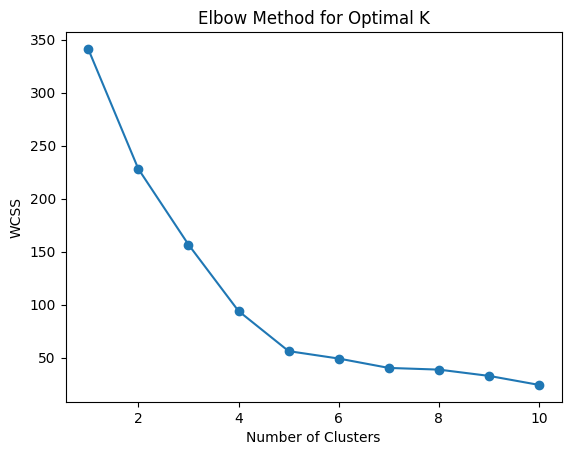

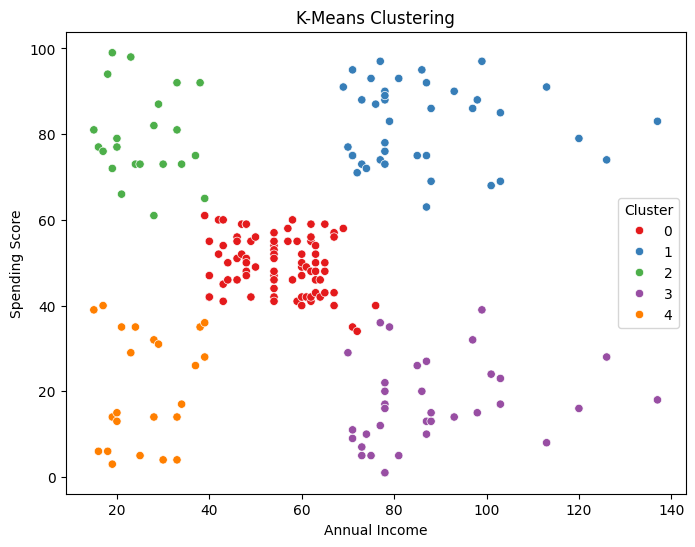

In [ ]:
# Find optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Applying K-Means with optimal K (let's assume K=5 from elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['Cluster'], palette='Set1')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate K-Means
kmeans_silhouette = silhouette_score(X_scaled, df['Cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')

# Evaluate Hierarchical Clustering
hc_silhouette = silhouette_score(X_scaled, df['Cluster_HC'])
print(f'Hierarchical Clustering Silhouette Score: {hc_silhouette:.2f}')


In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate K-Means
kmeans_silhouette = silhouette_score(X_scaled, data['Cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')




K-Means Silhouette Score: 0.55
